In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
# df = pd.read_csv("data/aug/data_aug_2024-03-25.csv")

In [3]:
df = pd.read_csv("data/aug/data_aug_2024-03-25.csv")
df_dem = pd.read_csv("data/LocalLogic/Demographics/demographics_for_2024-03-25.csv")
df_loc = pd.read_csv("data/LocalLogic/Locations/locations_for_2024-03-25.csv")

df_dem["id"] = df_dem["id"].astype(int)
df_loc["id"] = df_loc["id"].astype(int)

df = pd.merge(df, df_dem, on="id")
df = pd.merge(df, df_loc, on="id")

In [4]:
# url = "https://realtor.ca/real-estate/26631578/3855-southwinds-unit-403-windsor"
# df.loc[df["page_url"] == url, "size_interior"] = 0

# First Glance

In [5]:
df.head()

,id,id_mls,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks
0,26639235,24005541,3.0,0.0,4.0,2.5,2810.0,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,0.0,3.5,3.0,1.5,2.5,5.0,2.0,3.0,5.0,3.5
1,26639230,24005774,2.0,0.0,2.0,1.0,1072.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,0.0,3.0,4.5,1.0,3.0,4.5,0.5,1.5,4.5,3.5
2,26639229,24005776,3.0,0.0,4.0,2.0,1.0,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,0.0,2.5,4.0,0.5,1.0,5.0,0.0,1.0,5.0,0.0
3,26639225,24005786,1.0,0.0,4.0,1.0,1.0,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,0.0,3.5,3.5,2.0,2.0,4.0,2.0,2.5,3.0,3.5
4,26638941,24005778,2.0,0.0,2.0,1.0,1100.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,...,0.0,3.0,5.0,0.5,2.0,5.0,0.0,1.0,3.5,0.0


In [6]:
df.shape

(90686, 79)

In [7]:
len(df)

90686

In [8]:
len(df["page_url"].unique())

90686

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90686 entries, 0 to 90685
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          90686 non-null  int64  
 1   id_mls                      90686 non-null  object 
 2   bathrooms_total             90686 non-null  float64
 3   bedrooms_extra              90686 non-null  float64
 4   bedrooms                    90686 non-null  float64
 5   stories_total               90686 non-null  float64
 6   size_interior               90686 non-null  float64
 7   building_type               90686 non-null  object 
 8   agency_name                 90686 non-null  object 
 9   agency_type                 90686 non-null  object 
 10  property_type               90686 non-null  object 
 11  lng                         90686 non-null  float64
 12  lat                         90686 non-null  float64
 13  ownership_type              906

In [10]:
df_with_size = df[df["size_interior"].notna()]

In [11]:
df["province"].value_counts()

province
Ontario                    31262
Quebec                     19195
British Columbia           18967
Alberta                    10723
Saskatchewan                3640
Manitoba                    2428
Nova Scotia                 2148
New Brunswick               1236
Newfoundland & Labrador      504
Prince Edward Island         447
Yukon                         87
Northwest Territories         49
Name: count, dtype: int64

In [12]:
df_with_size["province"].value_counts()

province
Ontario                    31262
Quebec                     19195
British Columbia           18967
Alberta                    10723
Saskatchewan                3640
Manitoba                    2428
Nova Scotia                 2148
New Brunswick               1236
Newfoundland & Labrador      504
Prince Edward Island         447
Yukon                         87
Northwest Territories         49
Name: count, dtype: int64

In [13]:
np.round(df.describe())

,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks
count,90686.0,90686.0,90686.0,90686.0,90686.0,90686.0,90686.0,90686.0,90686.0,90686.0,...,90670.0,90670.0,90670.0,90670.0,90670.0,90670.0,90670.0,90670.0,90670.0,90670.0
mean,26453984.0,2.0,0.0,3.0,1.0,5305.0,-92.0,47.0,1.0,3.0,...,0.0,2.0,4.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0
std,297656.0,1.0,0.0,1.0,1.0,317174.0,21.0,3.0,1.0,3.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
min,20535215.0,0.0,0.0,0.0,1.0,-2209.0,-139.0,42.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,26414156.0,1.0,0.0,2.0,1.0,1011.0,-114.0,44.0,1.0,0.0,...,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
50%,26553036.0,2.0,0.0,3.0,1.0,1497.0,-80.0,46.0,1.0,2.0,...,0.0,2.0,4.0,0.0,2.0,2.0,0.0,2.0,4.0,0.0
75%,26618726.0,3.0,0.0,4.0,2.0,2360.0,-75.0,49.0,1.0,4.0,...,0.0,3.0,5.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0
max,26664481.0,7.0,2.0,8.0,3.0,90703862.0,-53.0,69.0,2.0,13.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


# Data Preprocessing (Phase 1)

## Postal Code Feature Extraction

## Removing Unwanted Features

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90686 entries, 0 to 90685
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          90686 non-null  int64  
 1   id_mls                      90686 non-null  object 
 2   bathrooms_total             90686 non-null  float64
 3   bedrooms_extra              90686 non-null  float64
 4   bedrooms                    90686 non-null  float64
 5   stories_total               90686 non-null  float64
 6   size_interior               90686 non-null  float64
 7   building_type               90686 non-null  object 
 8   agency_name                 90686 non-null  object 
 9   agency_type                 90686 non-null  object 
 10  property_type               90686 non-null  object 
 11  lng                         90686 non-null  float64
 12  lat                         90686 non-null  float64
 13  ownership_type              906

In [15]:
df = df.drop(["agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

## Handling Missing Values for Interior Size 

### First Looks

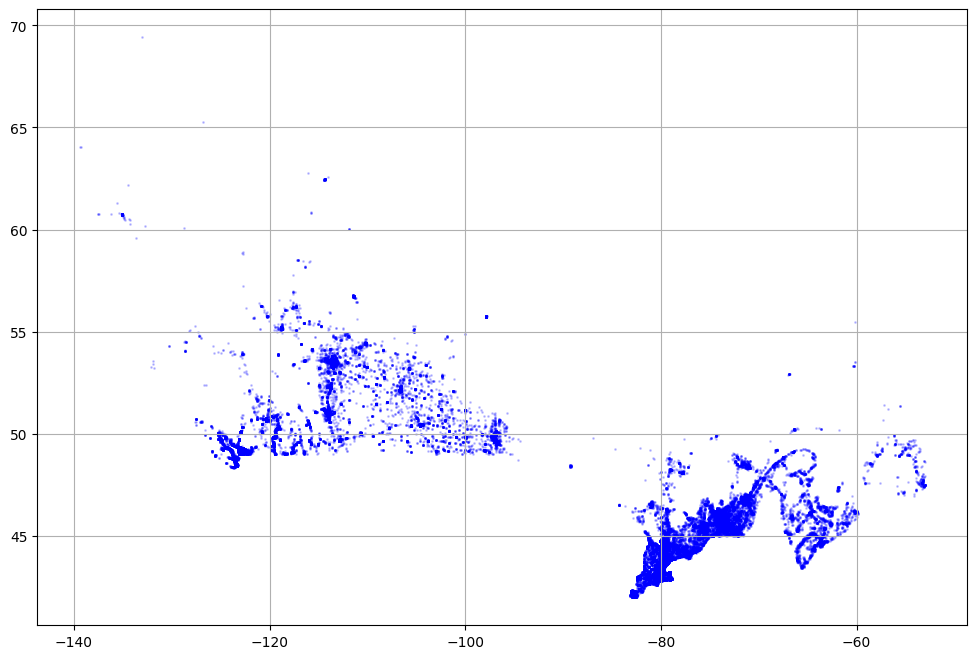

In [16]:
df_notna = df[df["size_interior"].notna()]
df_na = df[df["size_interior"].isna()]


plt.figure(figsize=(12,8))
plt.grid()

plt.scatter(df_notna["lng"], df_notna["lat"], alpha=0.2, s=1, c="blue")
plt.scatter(df_na["lng"], df_na["lat"], alpha=0.2, s=1, c="red")


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90686 entries, 0 to 90685
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          90686 non-null  int64  
 1   id_mls                      90686 non-null  object 
 2   bathrooms_total             90686 non-null  float64
 3   bedrooms_extra              90686 non-null  float64
 4   bedrooms                    90686 non-null  float64
 5   stories_total               90686 non-null  float64
 6   size_interior               90686 non-null  float64
 7   building_type               90686 non-null  object 
 8   lng                         90686 non-null  float64
 9   lat                         90686 non-null  float64
 10  ownership_type_group_ids    90686 non-null  int64  
 11  parkings                    90686 non-null  float64
 12  province                    90686 non-null  object 
 13  price                       906

In [18]:
df[(df["size_interior"] == 0) | (df["size_interior"] == 1)]["province"].value_counts()

province
Ontario                    3828
Quebec                     2144
Nova Scotia                  33
Prince Edward Island         18
Manitoba                     14
British Columbia              8
Saskatchewan                  3
Yukon                         2
New Brunswick                 1
Newfoundland & Labrador       1
Alberta                       1
Northwest Territories         1
Name: count, dtype: int64

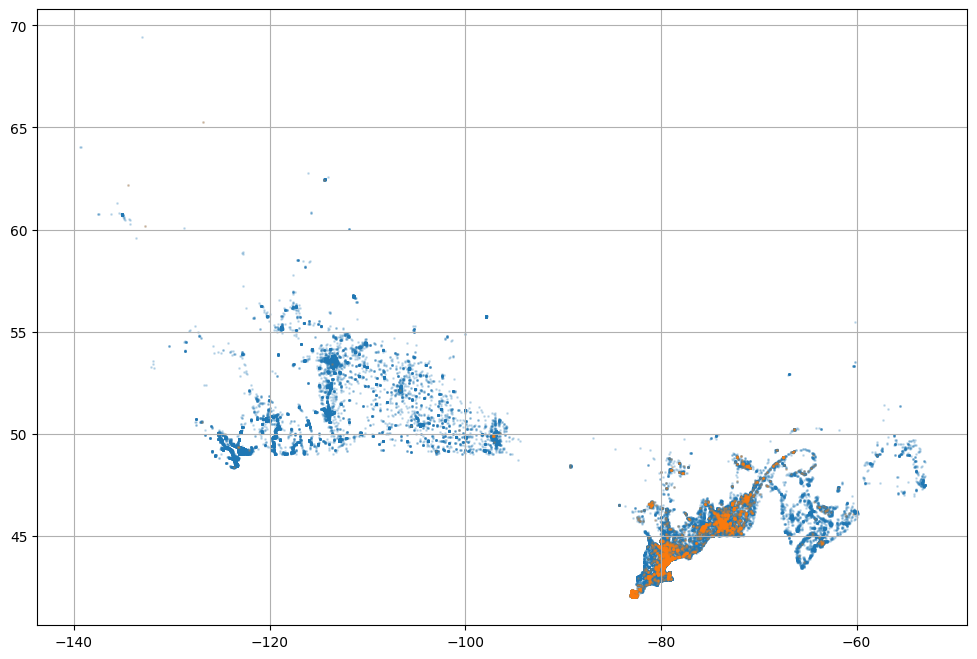

In [19]:
df_notna = df[df["size_interior"].notna()]
df_na = df[(df["size_interior"] == 0) | (df["size_interior"] == 1)]


plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(df_notna["lng"], df_notna["lat"], alpha=0.2, s=1)
plt.scatter(df_na["lng"], df_na["lat"], alpha=0.2, s=1)



In [20]:
df_size = df.copy(deep=True)

In [21]:
# Surprisingly, some houses have a negative size
df_size["size_interior"] = abs(df_size["size_interior"])

In [22]:
# set houses with size of 0 or 1 to NaN
df_size["size_interior"] = df_size["size_interior"].replace([0,1], np.NaN)

In [23]:
df_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90686 entries, 0 to 90685
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          90686 non-null  int64  
 1   id_mls                      90686 non-null  object 
 2   bathrooms_total             90686 non-null  float64
 3   bedrooms_extra              90686 non-null  float64
 4   bedrooms                    90686 non-null  float64
 5   stories_total               90686 non-null  float64
 6   size_interior               84632 non-null  float64
 7   building_type               90686 non-null  object 
 8   lng                         90686 non-null  float64
 9   lat                         90686 non-null  float64
 10  ownership_type_group_ids    90686 non-null  int64  
 11  parkings                    90686 non-null  float64
 12  province                    90686 non-null  object 
 13  price                       906

In [24]:
df_size[(df_size["size_interior"] == 0) | (df_size["size_interior"] == 1)]["province"].value_counts()

Series([], Name: count, dtype: int64)

## Removinf Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

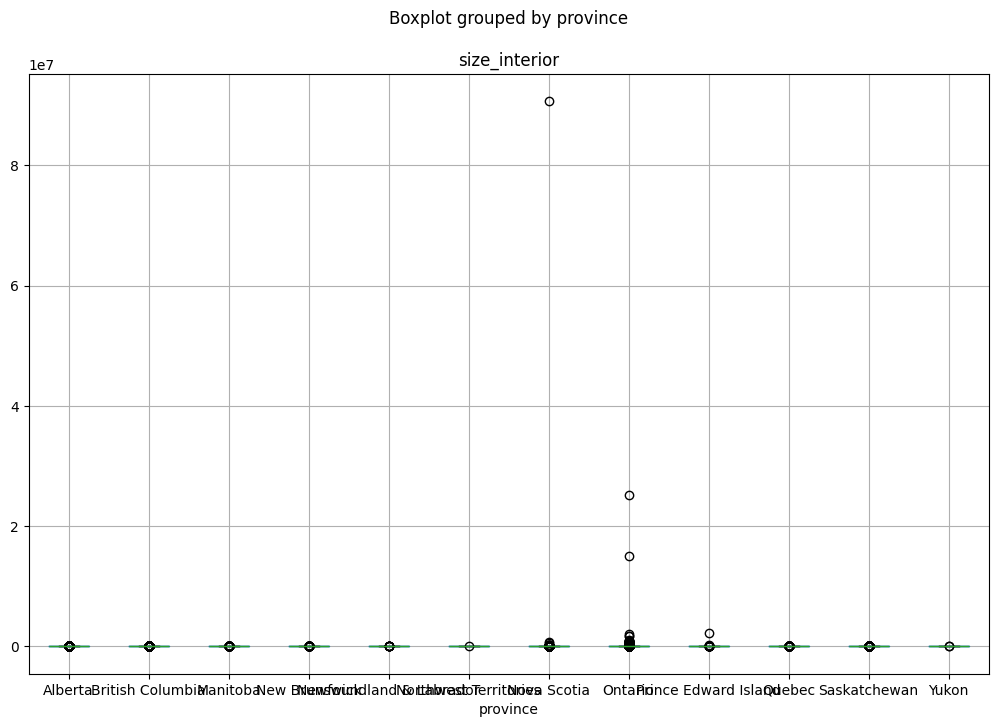

In [25]:
df_size.boxplot(column="size_interior", by="province", figsize=(12,8))

In [26]:
# for province in df_size["province"].unique():
#     for building_type in df_size["building_type"].unique():

#         mask = (df_size["province"] == province) & (df_size["building_type"] == building_type)
#         # mask = (df_norm["province"] == province)

#         q1 = df_size[mask]["size_interior"].quantile(0.25)
#         q3 = df_size[mask]["size_interior"].quantile(0.75)
#         iqr = q3 - q1

#         # remove outliers
#         df_size[mask] = df_size[mask][df_size[mask]["size_interior"]<=abs(q3+1.5*iqr)]

#         df_szie = df_size[df_size["size_interior"].notna()]

In [27]:
q1 = df_size["size_interior"].quantile(0.25)
q3 = df_size["size_interior"].quantile(0.75)
iqr = q3 - q1

df_size = df_size[df_size["size_interior"] < (q3+1.5*iqr)]

<Axes: title={'center': 'size_interior'}, xlabel='province'>

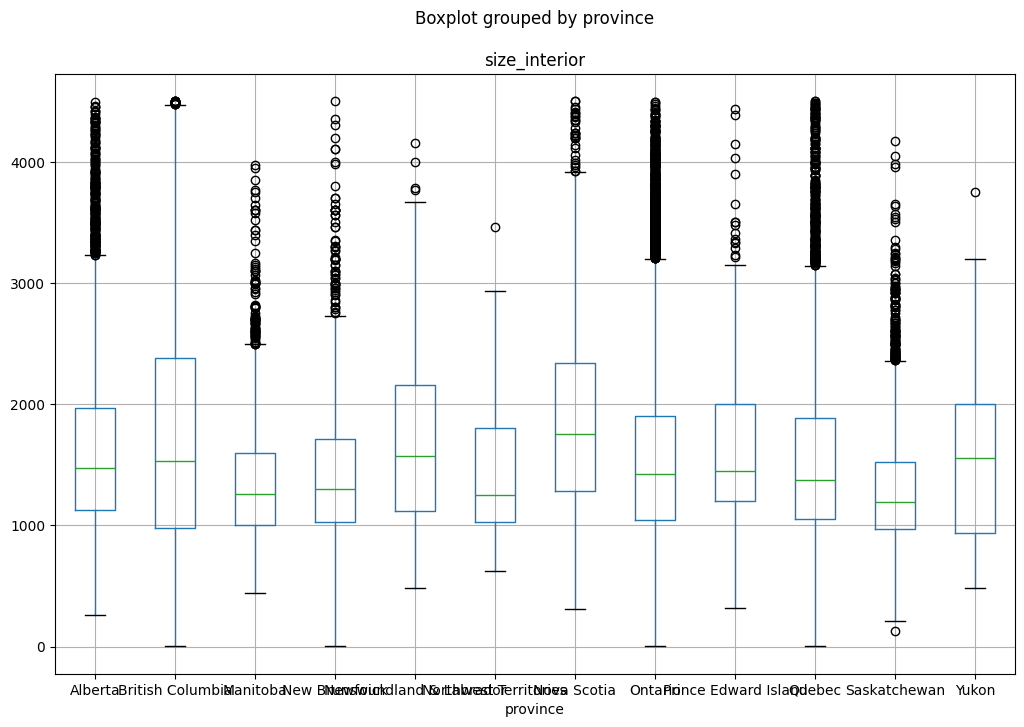

In [28]:
df_size.boxplot(column="size_interior", by="province", figsize=(12,8))

In [29]:
df_size[df_size["size_interior"] < 0]

,id,id_mls,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,lng,lat,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks


### Fill determine missing size values through KNN

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [32]:
df_size.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72869 entries, 0 to 90685
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          72869 non-null  int64  
 1   id_mls                      72869 non-null  object 
 2   bathrooms_total             72869 non-null  float64
 3   bedrooms_extra              72869 non-null  float64
 4   bedrooms                    72869 non-null  float64
 5   stories_total               72869 non-null  float64
 6   size_interior               72869 non-null  float64
 7   building_type               72869 non-null  object 
 8   lng                         72869 non-null  float64
 9   lat                         72869 non-null  float64
 10  ownership_type_group_ids    72869 non-null  int64  
 11  parkings                    72869 non-null  float64
 12  province                    72869 non-null  object 
 13  price                       72869 no

In [33]:
# one_hot = OneHotEncoder()

# df_enc = one_hot.fit_transform(df)

# print(df.shape)
# print(df_enc.shape)

In [34]:
df_enc = pd.get_dummies(df_size[df_size["province"] == "Alberta"])
df_enc.shape

(18048, 18121)

In [35]:
np.array(df_enc["price"])

array([489000., 679900., 469000., ..., 525000., 995000., 559000.])

In [36]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(df_enc.drop("price", axis=1))
y_scaled = scaler_y.fit_transform(np.array(df_enc["price"]).reshape(-1,1))

: 

In [ ]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False).head(20)

price                         1.000000
bathrooms_total               0.471209
individual_income             0.411008
household_income              0.411008
bedrooms                      0.315667
edu_bachelor_degree           0.298261
edu_post_graduate_degree      0.295216
lang_other                    0.256022
edu_university_certificate    0.253007
multi_family                  0.242228
parkings                      0.198080
loc_parks                     0.195017
area_duplex                   0.190957
loc_wellness                  0.179005
lang_en_only                  0.151852
single_family                 0.135361
commute_transit               0.134977
commute_bicycle               0.129295
loc_transit_friendly          0.128949
age_15_to_19                  0.103098
Name: price, dtype: float64

In [ ]:
y_scaled

array([[-0.59403101],
       [-0.64426285],
       [-0.84519023],
       ...,
       [-0.54379916],
       [-1.13151174],
       [-0.77988883]])

In [ ]:
imputer = KNNImputer(n_neighbors=5)
X_knn = imputer.fit_transform(X_scaled)

In [ ]:
X_knn

array([[-0.07783366,  0.68623907,  0.        , ..., -0.22402137,
        -0.21944453,  0.        ],
       [-0.69840423, -0.90366619,  0.        , ..., -0.22402137,
        -0.21944453,  0.        ],
       [-3.2206177 ,  0.68623907,  0.        , ..., -0.22402137,
        -0.21944453,  0.        ],
       ...,
       [-2.41305802,  0.68623907,  0.        , ..., -0.22402137,
        -0.21944453,  0.        ],
       [-3.99938368, -0.90366619,  0.        , ..., -0.22402137,
        -0.21944453,  0.        ],
       [ 0.70929187, -0.90366619,  0.        , ..., -0.22402137,
        -0.21944453,  0.        ]])

In [44]:
from sklearn.model_selection import cross_val_score, KFold


In [46]:
kf = KFold(n_splits=5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(max_depth=5)

In [40]:
cross_val_score(rf, X_knn, y_scaled, cv=kf, scoring="r2")

/home/soheil/codes/WebScraping/Realtor/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


/home/soheil/codes/WebScraping/Realtor/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soheil/codes/WebScraping/Realtor/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soheil/codes/WebScraping/Realtor/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soheil/codes/WebScraping/Realtor/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474:

array([-0.85359087,  0.30273508,  0.3130324 ,  0.36014843, -0.0354419 ])

In [41]:
from xgboost import XGBRegressor

In [42]:
xgb = XGBRegressor()

In [47]:
cross_val_score(xgb, X_knn, y_scaled, cv=kf, scoring="r2")

array([0.29856415, 0.69819256, 0.35966339, 0.47615497, 0.51218308])

In [48]:
xgb.fit(X_knn, y_scaled)
y_pred = xgb.predict(X_knn)

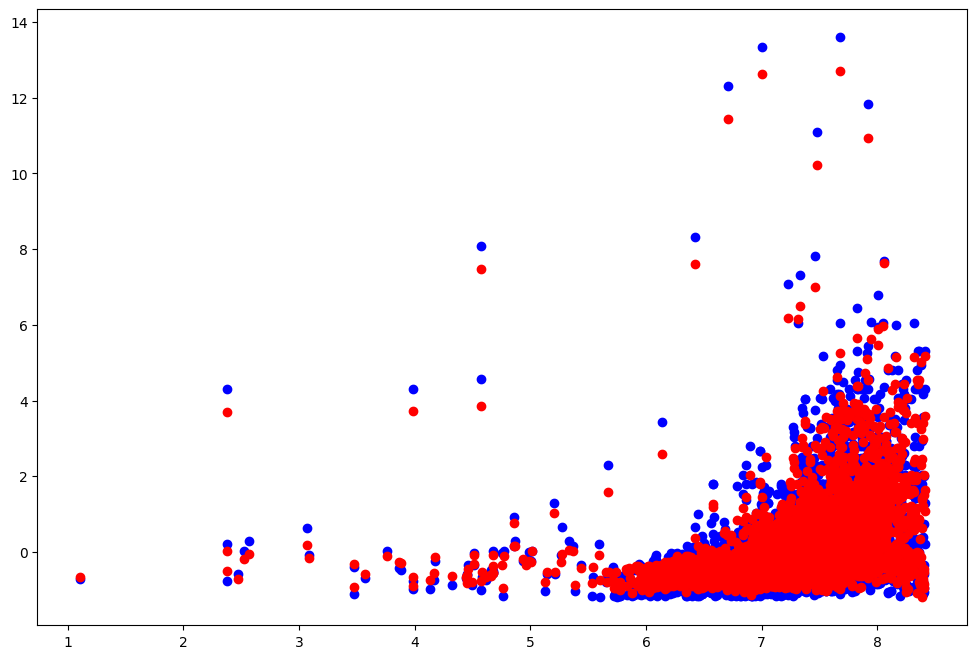

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(np.log(df_enc["size_interior"]), y_scaled, c="blue")
plt.scatter(np.log(df_enc["size_interior"]), y_pred, c="red")

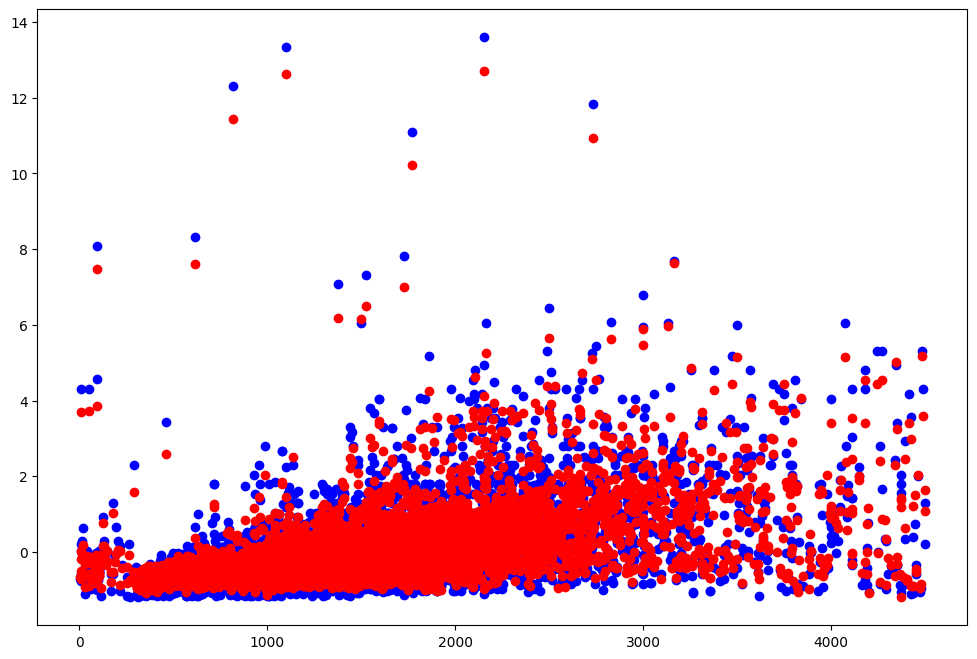

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(df_enc["size_interior"], y_scaled, c="blue")
plt.scatter(df_enc["size_interior"], y_pred, c="red")

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_knn, y_scaled, test_size=0.2)

In [52]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5840446485392191

# Correlation / Plotting

In [ ]:
df["province"].value_counts()

province
Ontario                    22375
Quebec                     16765
British Columbia           15260
Alberta                     8634
Saskatchewan                3249
Manitoba                    2022
Nova Scotia                 1900
New Brunswick                983
Newfoundland & Labrador      475
Prince Edward Island         425
Yukon                         80
Northwest Territories         40
Name: count, dtype: int64

<Axes: xlabel='lng', ylabel='lat'>

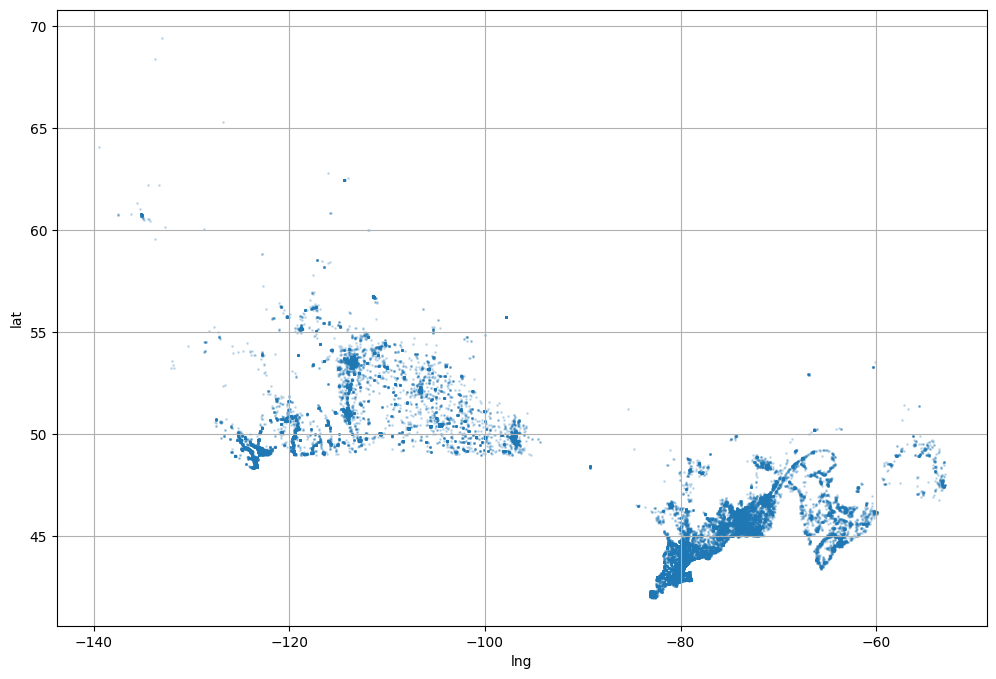

In [ ]:
df.plot(kind='scatter', x='lng', y='lat', grid=True, alpha=0.2, s=1, figsize=(12,8))

<Axes: xlabel='lng', ylabel='lat'>

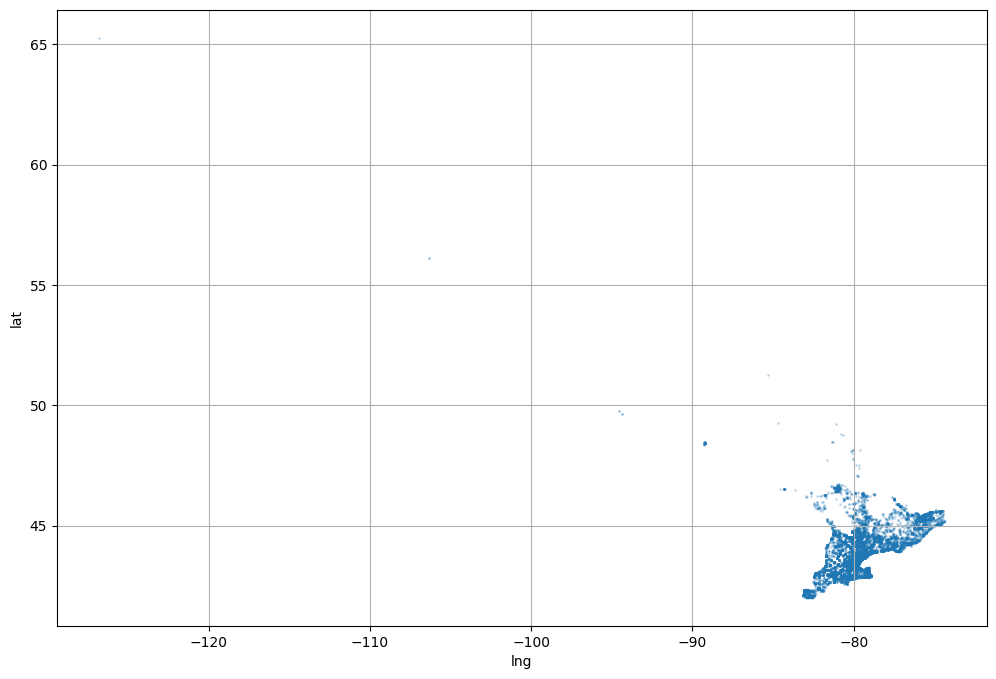

In [ ]:
df[df["province"] == "Ontario"].plot(kind='scatter', x='lng', y='lat', grid=True, alpha=0.2, s=1, figsize=(12,8))

<Axes: xlabel='lng', ylabel='lat'>

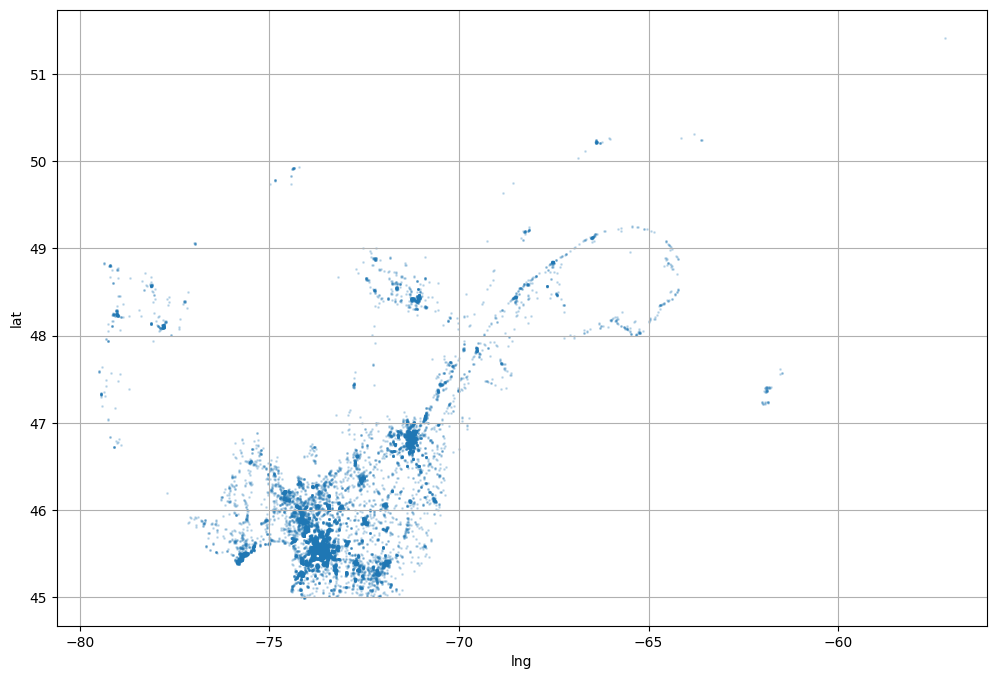

In [ ]:
df[df["province"] == "Quebec"].plot(kind='scatter', x='lng', y='lat', grid=True, alpha=0.2, s=1, figsize=(12,8))

<Axes: xlabel='lng', ylabel='lat'>

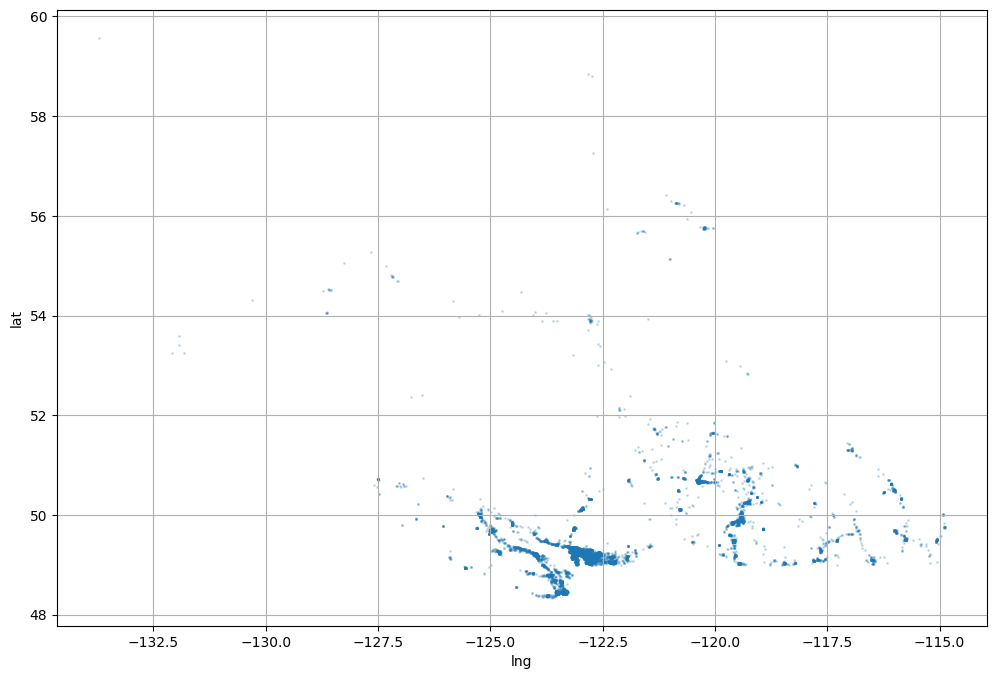

In [ ]:
df[df["province"] == "British Columbia"].plot(kind='scatter', x='lng', y='lat', grid=True, alpha=0.2, s=1, figsize=(12,8))

In [ ]:
corr_matrix = df.corr(numeric_only=True)

In [ ]:
corr_matrix

,id,bathrooms_total,bedrooms,bedrooms_extra,stories_total,lng,lat,parkings,timestamp,price
id,1.000000,0.224265,0.223967,0.083283,0.033433,-0.010154,-0.151233,0.063169,0.998342,0.025221
bathrooms_total,0.224265,1.000000,0.777103,0.286265,-0.037989,-0.210316,0.000704,0.216104,0.225755,0.289029
bedrooms,0.223967,0.777103,1.000000,0.080997,-0.083372,-0.106585,-0.015093,0.231135,0.223922,0.180732
bedrooms_extra,0.083283,0.286265,0.080997,1.000000,-0.055561,0.046555,-0.110620,0.114981,0.085543,0.062436
stories_total,0.033433,-0.037989,-0.083372,-0.055561,1.000000,-0.007658,-0.004733,-0.008254,0.033664,0.005196
lng,-0.010154,-0.210316,-0.106585,0.046555,-0.007658,1.000000,-0.732953,0.075389,-0.009557,-0.142754
lat,-0.151233,0.000704,-0.015093,-0.110620,-0.004733,-0.732953,1.000000,-0.118390,-0.153447,-0.052923
parkings,0.063169,0.216104,0.231135,0.114981,-0.008254,0.075389,-0.118390,1.000000,0.062575,0.123329
timestamp,0.998342,0.225755,0.223922,0.085543,0.033664,-0.009557,-0.153447,0.062575,1.000000,0.025170
price,0.025221,0.289029,0.180732,0.062436,0.005196,-0.142754,-0.052923,0.123329,0.025170,1.000000


In [ ]:
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
bathrooms_total    0.289029
bedrooms           0.180732
parkings           0.123329
bedrooms_extra     0.062436
id                 0.025221
timestamp          0.025170
stories_total      0.005196
lat               -0.052923
lng               -0.142754
Name: price, dtype: float64

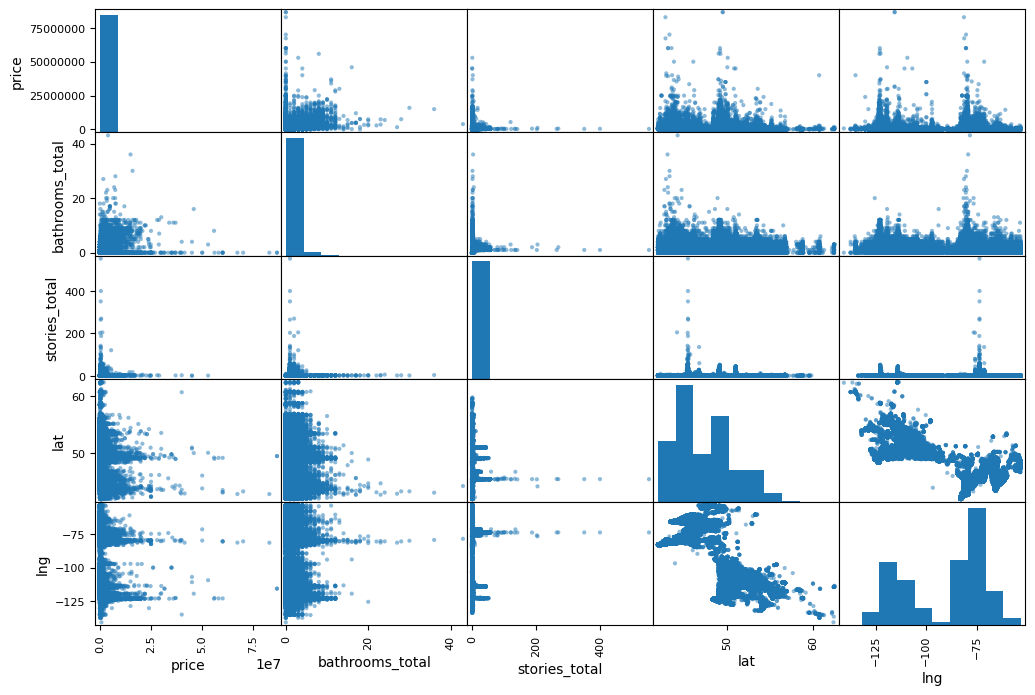

In [ ]:
pd.plotting.scatter_matrix(df[["price", "bathrooms_total", "stories_total", "lat", "lng"]], figsize=(12,8))
plt.show()

In [ ]:
df[df["property_type"] == "Vacant Land"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
2,26456713,24001397,0,0,NaN,NaN,none,JUMP REALTY INC.,Firm,Vacant Land,-83.091293,42.188171,Freehold,360.60 X 638.69 X 301.09 X 826.39,0,https://realtor.ca/real-estate/26456713/vl-fro...,638421447604000000,N9J2P3,Ontario,699900.0
24,26446688,24001421,0,0,NaN,NaN,No Building,BOB PEDLER REAL ESTATE LIMITED,Firm,Vacant Land,-83.040967,42.283043,Freehold,50.14 FT X 150.58 FT,0,https://realtor.ca/real-estate/26446688/vl-par...,638417883447830000,N9B3X7,Ontario,69900.0
43,26439504,24001306,0,0,NaN,NaN,No Building,MANOR WINDSOR REALTY LTD. - 455,Firm,Vacant Land,-83.029588,42.317863,Freehold,59.72 FT X IRREG,0,https://realtor.ca/real-estate/26439504/vl-bra...,638416227455270000,N9A3E5,Ontario,172999.0
46,26439225,24001285,0,0,NaN,NaN,none,KEY SOLUTIONS REALTY LTD. - 390,Firm,Vacant Land,-83.039977,42.298050,Freehold,SEE REMARKS,0,https://realtor.ca/real-estate/26439225/1001-t...,638416155445670000,N8X2A9,Ontario,735000.0
144,26404172,24000604,0,0,NaN,NaN,none,IDEAL: A BOUTIQUE REAL ESTATE BROKERAGE INC,Firm,Vacant Land,-83.033167,42.314672,Freehold,40 X IRREGULAR,0,https://realtor.ca/real-estate/26404172/682-wi...,638405246448770000,N9A3L5,Ontario,189000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148342,26420474,15380,0,0,NaN,NaN,none,RE/MAX ACTION REALTY,Firm,Vacant Land,-133.355602,62.227835,none,4.45 ac,0,https://realtor.ca/real-estate/26420474/14-tin...,638410342800670000,Y0B1K0,Yukon,79900.0
148349,26419774,5646,0,0,NaN,NaN,none,CENTURY 21 Prospect Realty,Firm,Vacant Land,-114.432743,62.431897,none,40375,0,https://realtor.ca/real-estate/26419774/159-en...,638410275367130000,NaN,Northwest Territories,599900.0
148358,26116167,5248,0,0,NaN,NaN,none,CENTURY 21 Prospect Realty,Firm,Vacant Land,-114.360061,62.459338,none,11551,0,https://realtor.ca/real-estate/26116167/4106-4...,638315396561270000,NaN,Northwest Territories,476000.0
148365,25629336,5426,0,0,NaN,NaN,none,COLDWELL BANKER NBS,Firm,Vacant Land,-114.415641,62.424715,none,119700,0,https://realtor.ca/real-estate/25629336/182-cu...,638206352620830000,NaN,Northwest Territories,829990.0


In [ ]:
df[df["property_type"] == "Vacant Land"]["page_url"]

2         https://realtor.ca/real-estate/26456713/vl-fro...
24        https://realtor.ca/real-estate/26446688/vl-par...
43        https://realtor.ca/real-estate/26439504/vl-bra...
46        https://realtor.ca/real-estate/26439225/1001-t...
144       https://realtor.ca/real-estate/26404172/682-wi...
                                ...                        
148342    https://realtor.ca/real-estate/26420474/14-tin...
148349    https://realtor.ca/real-estate/26419774/159-en...
148358    https://realtor.ca/real-estate/26116167/4106-4...
148365    https://realtor.ca/real-estate/25629336/182-cu...
148367    https://realtor.ca/real-estate/25176558/510651...
Name: page_url, Length: 32197, dtype: object

In [ ]:
df[df["land_size"] == "SEE REMARKS"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
46,26439225,24001285,0,0,NaN,NaN,none,KEY SOLUTIONS REALTY LTD. - 390,Firm,Vacant Land,-83.039977,42.298050,Freehold,SEE REMARKS,0,https://realtor.ca/real-estate/26439225/1001-t...,638416155445670000,N8X2A9,Ontario,735000.0
362,26282411,23023157,0,0,NaN,NaN,none,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Vacant Land,-83.085679,42.053964,Freehold,SEE REMARKS,0,https://realtor.ca/real-estate/26282411/vl-con...,638356720849930000,N9V2Y8,Ontario,799999.0


In [ ]:
df["land_size"].value_counts().head(50)

land_size
under 1/2 acre                  7086
0                               4632
Unknown                         2968
under 1 acre                    1216
1/2 - 1.99 acres                 802
0 x 0                            470
6000 sqft                        406
0|under 1 acre                   400
1 ac                             319
1 - 3 acres                      301
2 - 4.99 acres                   221
2 ac                             215
3 - 10 acres                     210
1/2 - 1 acre                     170
5 ac                             155
10 ac                            151
6000 sqft|4,051 - 7,250 sqft     142
0.14 ac|under 1 acre             139
5000 sqft                        138
7200 sqft                        135
x                                130
464.5 m2                         130
0.16 ac|under 1 acre             128
0.17 ac|under 1 acre             127
6250 sqft                        126
50 - 100 acres                   124
7000 sqft                   

In [ ]:
df["land_size"].value_counts().tail(20)

land_size
6164.97 m2    1
6916.7 m2     1
5002.1 m2     1
6079.5 m2     1
17588.3 m2    1
11224.6 m2    1
10184 m2      1
10221.9 m2    1
10547.6 m2    1
18669.6 m2    1
2146 m2       1
5012.5 m2     1
3838.6 m2     1
29094 sqft    1
5094.3 m2     1
5047.1 m2     1
5704.8 m2     1
8979 m2       1
7554.2 m2     1
43027         1
Name: count, dtype: int64

In [ ]:
df["size_interior"].value_counts().head(20)

size_interior
1200 sqft    238
1200.0000    190
960 sqft     178
1040 sqft    176
1120 sqft    170
1000 sqft    161
1216 sqft    152
1000.0000    150
1100.0000    147
1800 sqft    145
1400 sqft    144
900 sqft     143
1500 sqft    142
1152 sqft    130
1100 sqft    129
1500.0000    126
1600.0000    126
1400.0000    123
1080 sqft    118
1520 sqft    113
Name: count, dtype: int64

In [ ]:
df["size_interior"].value_counts().tail(20)

size_interior
1215.8800       1
5515 sqft       1
9017 sqft       1
1600.5 sqft     1
4493 sqft       1
9414 sqft       1
2518.4 sqft     1
5416.19 sqft    1
19750 sqft      1
2954 sqft       1
5112 sqft       1
7789 sqft       1
296 sqft        1
1127.7400       1
12006 sqft      1
16800 sqft      1
3643 sqft       1
2930.8600       1
1185.8100       1
2931 sqft       1
Name: count, dtype: int64

In [ ]:
df_vacant_land = df[df["property_type"] == "Vacant Land"]
df_vacant_land[df_vacant_land["size_interior"].notna()].head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
236,26376322,X7370396,0,0,NaN,9106.26 sqft,none,RIGHT AT HOME REALTY,Firm,Vacant Land,-83.031435,42.306148,none,50.19 x 181.49 FT,0,https://realtor.ca/real-estate/26376322/1170-p...,638394712515100000,N9A4L9,Ontario,650000.0
237,26376323,X7370408,0,0,NaN,9084.73 sqft,none,RIGHT AT HOME REALTY,Firm,Vacant Land,-83.031980,42.305510,none,50.11 x 181.6 FT,0,https://realtor.ca/real-estate/26376323/1181-o...,638394712516000000,N9A4K1,Ontario,650000.0
238,26376324,X7370416,0,0,NaN,18190.99 sqft,none,RIGHT AT HOME REALTY,Firm,Vacant Land,-83.031980,42.305510,none,100.4 x 180.6 FT,0,https://realtor.ca/real-estate/26376324/1181-o...,638394712516800000,N9A4L9,Ontario,1300000.0
966,26395735,H4182641,0,0,NaN,93810 sqft,none,"Keller Williams Edge Realty, Brokerage",Firm,Vacant Land,-82.205292,42.196457,none,159 x 590,0,https://realtor.ca/real-estate/26395735/5194-t...,638403448209000000,N0P1W0,Ontario,294999.0
1738,26127272,X7050502,0,0,NaN,131384 sqft,none,HOMELIFE SUPERSTARS REAL ESTATE LIMITED,Firm,Vacant Land,-82.440597,42.263559,none,159.81 x 541.04 Acre ; 3.02,0,https://realtor.ca/real-estate/26127272/42-mil...,638318789936400000,N0P2L0,Ontario,2500000.0


In [ ]:
df_vacant_land[df_vacant_land["size_interior"].notna()].shape

(371, 20)

In [ ]:
df_vacant_land.shape

(32197, 20)

In [ ]:
df["agency_name"].value_counts().head(20)

agency_name
eXp Realty                               2156
PROPRIO DIRECT                           1953
EXP REALTY                               1162
RIGHT AT HOME REALTY                      659
VIA CAPITALE SÉLECT                       658
Real Broker                               596
Keller Williams Capital Realty            568
CIR Realty                                552
Sutton Group-West Coast Realty            549
RE/MAX Crest Realty                       532
Royal LePage Kelowna                      528
RE/MAX Kelowna                            520
VENDIRECT INC.                            511
EXP AGENCE IMMOBILIÈRE                    508
RE/MAX CRYSTAL                            506
ROYAL LEPAGE PROALLIANCE REALTY           494
Exp Realty                                476
RE/MAX Elite                              472
Sotheby's International Realty Canada     469
RE/MAX D'ABORD INC.                       451
Name: count, dtype: int64

<Axes: title={'center': 'price'}, xlabel='province'>

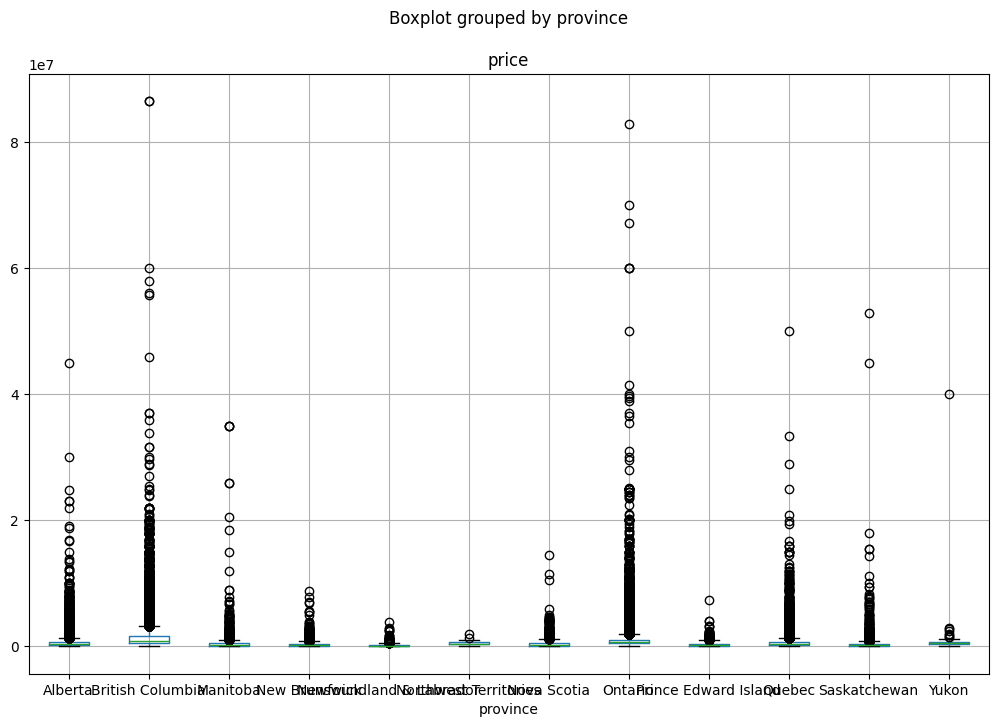

In [ ]:
df.boxplot(column="price", by="province", figsize=(12,8))

In [ ]:
df_ON = df[df["province"] == "Ontario"]
df_QC = df[df["province"] == "Quebec"]
df_BC = df[df["province"] == "British Columbia"]
df_AB = df[df["province"] == "Alberta"]
df_SK = df[df["province"] == "Saskatchewan"]
df_NS = df[df["province"] == "Nova Scotia"]
df_NB = df[df["province"] == "New Brunswick"]
df_MB = df[df["province"] == "Manitoba"]
df_NL = df[df["province"] == "Newfoundland & Labrador"]
df_PE = df[df["province"] == "Prince Edward Island"]
df_YT = df[df["province"] == "Yukon"]
df_NT = df[df["province"] == "Northwest Territories"]
df_NU = df[df["province"] == "Nunavut"] # Currently empty

<Axes: >

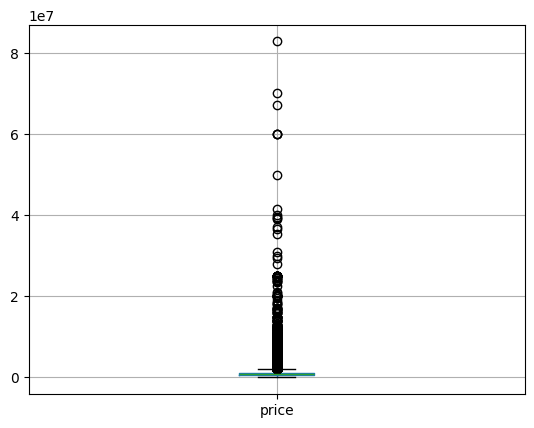

In [ ]:
df_ON.boxplot(column="price")

<Axes: ylabel='bathrooms_total'>

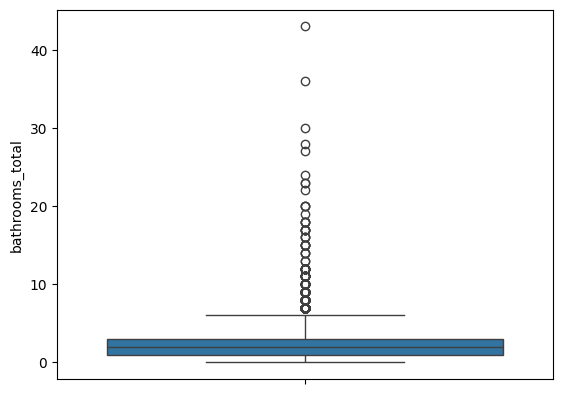

In [ ]:
sns.boxplot(df_ON["bathrooms_total"])

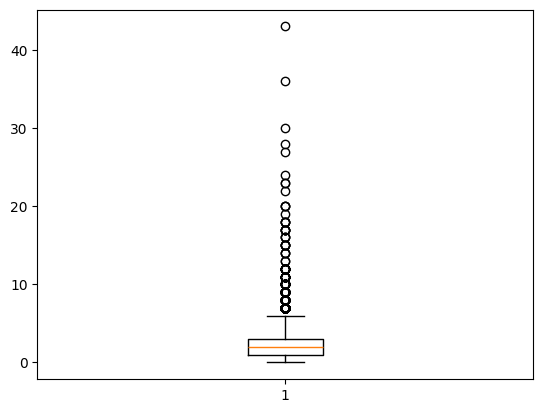

In [ ]:
plt.boxplot(df_ON["bathrooms_total"])
plt.show()

In [ ]:
df_ON[df_ON["bathrooms_total"] >= 30]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
13812,26434530,40529705,30,60,2.0,27600.0000,none,Coldwell Banker Realty In Motion,Firm,Multi-family,-79.814417,43.357911,Freehold,1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26434530/1291-n...,638414445325870000,L7P2R5,Ontario,15990000.0
17256,26395608,40525248,36,36,4.0,31065.0000,none,"BOLDT REALTY INC., BROKERAGE",Firm,Multi-family,-79.200157,43.125079,Freehold,under 1/2 acre,18,https://realtor.ca/real-estate/26395608/10-alb...,638403433402030000,L2V1P1,Ontario,15000000.0
30501,25964020,X6755256,43,0,NaN,29000 sqft,Multi-Family,RE/MAX HALLMARK EASTERN REALTY,Firm,Multi-family,-78.326866,44.298204,none,201.86 x 139.61 FT,0,https://realtor.ca/real-estate/25964020/400-wo...,638280623649530000,K9J3N5,Ontario,3995000.0


In [ ]:
df_ON[df_ON["bathrooms_total"] >= 30]["page_url"]

13812    https://realtor.ca/real-estate/26434530/1291-n...
17256    https://realtor.ca/real-estate/26395608/10-alb...
30501    https://realtor.ca/real-estate/25964020/400-wo...
Name: page_url, dtype: object

In [ ]:
';'

515950.0 1100000.0 584050.0
Original ON df: (40515, 20)
Normalized ON df: (31276, 20)


In [ ]:
q3+1.5*iqr

1976075.0

<Axes: >

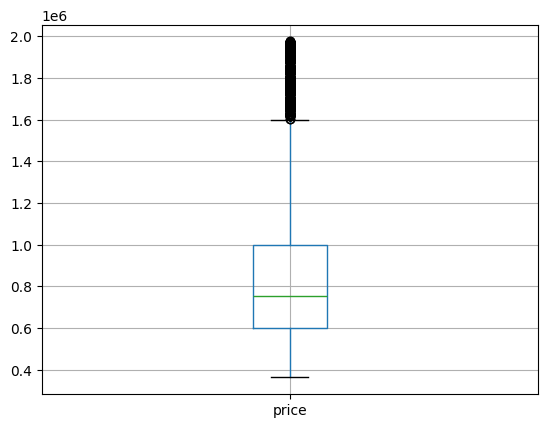

In [ ]:
df_ON_norm.boxplot(column="price")

<Axes: >

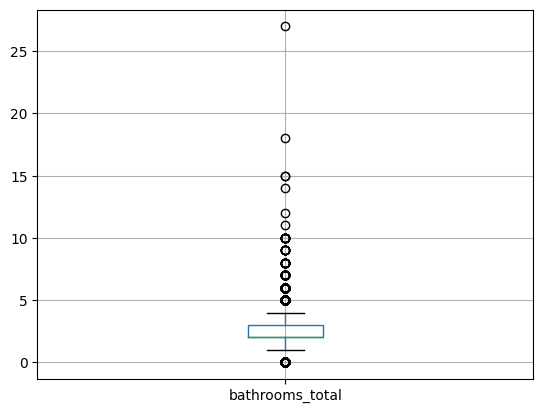

In [ ]:
df_ON_norm.boxplot(column="bathrooms_total")

In [ ]:
np.argmax(df_ON_norm["price"])

8430

In [ ]:
np.round(df_ON_norm.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,31276.0,31276.0,22954.0,31276.0,31276.0,31276.0,3.127600e+04,31276.0
mean,26297300.0,2.0,2.0,-80.0,44.0,3.0,6.383712e+17,853146.0
std,233281.0,1.0,2.0,2.0,1.0,5.0,6.303544e+13,357699.0
min,19098038.0,0.0,0.0,-95.0,42.0,0.0,6.365465e+17,362500.0
25%,26263261.0,2.0,1.0,-80.0,43.0,0.0,6.383509e+17,599000.0
50%,26372810.0,2.0,2.0,-80.0,44.0,2.0,6.383896e+17,755250.0
75%,26421191.0,3.0,2.0,-79.0,44.0,5.0,6.384104e+17,999999.0
max,26457359.0,27.0,205.0,-74.0,51.0,205.0,6.384215e+17,1975900.0


In [ ]:
df_ON_norm.head(10)

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26456962,24001582,3,4 + 0,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,-83.029887,42.141294,Freehold,130X485 FT,0,https://realtor.ca/real-estate/26456962/5341-m...,638421483713070000,N9V2Y9,Ontario,739888.0
1,26456959,24001586,2,3 + 0,NaN,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,-83.105049,42.135395,Freehold,51.8X124.5,0,https://realtor.ca/real-estate/26456959/502-ha...,638421483701230000,N9V0A9,Ontario,759900.0
2,26456713,24001397,0,0,NaN,NaN,none,JUMP REALTY INC.,Firm,Vacant Land,-83.091293,42.188171,Freehold,360.60 X 638.69 X 301.09 X 826.39,0,https://realtor.ca/real-estate/26456713/vl-fro...,638421447604000000,N9J2P3,Ontario,699900.0
3,26456285,24001573,2,3 + 1,NaN,NaN,House,JUMP REALTY INC.,Firm,Single Family,-83.036243,42.283139,Freehold,50X116,0,https://realtor.ca/real-estate/26456285/2146-m...,638421411467270000,N9B3X9,Ontario,749900.0
4,26456146,24001565,2,2 + 0,1.0,1600.0000,Row / Townhouse,DEERBROOK REALTY INC. - 175,Firm,Single Family,-83.013567,42.232631,Freehold,45.37X137.96,0,https://realtor.ca/real-estate/26456146/1331-t...,638421375479770000,N9H0L9,Ontario,789900.0
5,26456020,24001553,6,8 + 0,NaN,NaN,none,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,-83.017318,42.312901,Freehold,30X139.91 FT,0,https://realtor.ca/real-estate/26456020/1107-m...,638421339539770000,N8A2J3,Ontario,999000.0
6,26456019,24001554,3,5 + 0,2.0,NaN,Duplex,KEY SOLUTIONS REALTY LTD. - 390,Firm,Single Family,-83.044259,42.315578,Freehold,40X115,0,https://realtor.ca/real-estate/26456019/354-br...,638421339537700000,N9A4W5,Ontario,399000.0
7,26452892,24000980,2,5 + 0,2.0,NaN,Duplex,JUMP REALTY INC.,Firm,Single Family,-83.023864,42.319159,Freehold,42.99X102.39,0,https://realtor.ca/real-estate/26452892/566-pa...,638419035876970000,N9A2C3,Ontario,599000.0
10,26452303,24001530,2,2 + 0,NaN,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,-83.024433,42.236323,Condominium/Strata,NaN,0,https://realtor.ca/real-estate/26452303/2600-s...,638418963647070000,N9H0N6,Ontario,549900.0
12,26451550,24001518,3,2 + 2,NaN,1385.0000,Row / Townhouse,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,-83.077435,42.249912,Condominium/Strata,33.53XIRREG,0,https://realtor.ca/real-estate/26451550/5915-b...,638418891572470000,N9J3Y7,Ontario,649000.0


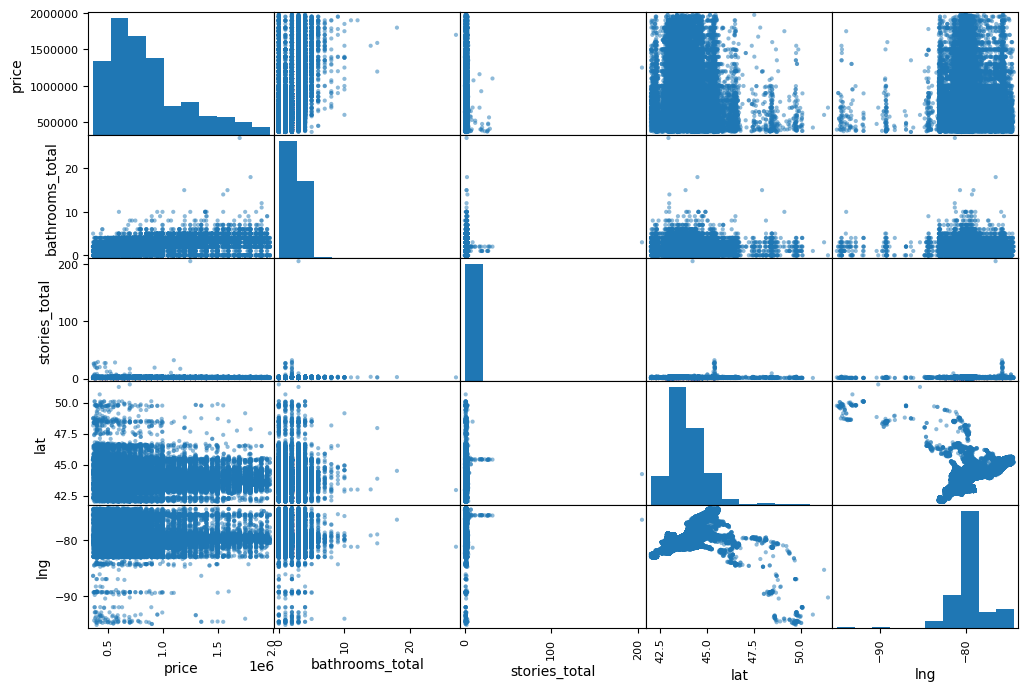

In [ ]:
pd.plotting.scatter_matrix(df_ON_norm[["price", "bathrooms_total", "stories_total", "lat", "lng"]], figsize=(12,8))
plt.show()

In [ ]:
corr_matrix = df_ON_norm.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
bathrooms_total    0.424347
parkings           0.275238
stories_total      0.059291
timestamp          0.000160
id                -0.002646
lng               -0.019047
lat               -0.058465
Name: price, dtype: float64

In [ ]:
df_no_post =  df[df["postal_code"].notna() == False]
df_no_post

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
153,26402213,23010574,4,4 + 0,2.0,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,-83.017961,42.223486,Freehold,81.96X*,0,https://realtor.ca/real-estate/26402213/4985-t...,638405032754130000,NaN,Ontario,1599999.0
167,26401205,24000510,3,3 + 1,1.0,NaN,House,JUMP REALTY INC.,Firm,Single Family,-83.102772,42.145023,Freehold,71.42X125.52,0,https://realtor.ca/real-estate/26401205/311-li...,638404624249270000,NaN,Ontario,899999.0
606,26447466,24001460,3,3 + 1,NaN,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,-82.743101,42.293802,Freehold,59.06X154.86,0,https://realtor.ca/real-estate/26447466/1401-p...,638417991429800000,NaN,Ontario,759800.0
707,26435344,24000854,1,1 + 0,1.5,NaN,House,M.C. HOMES REALTY INC.,Firm,Single Family,-82.201036,42.406868,Freehold,50X100,0,https://realtor.ca/real-estate/26435344/133-wo...,638415296533130000,NaN,Ontario,279000.0
850,26414079,24000113,1,1 + 0,NaN,NaN,Apartment,RE/MAX Sarnia Realty Inc,Firm,Single Family,-82.408480,42.972581,Condominium/Strata,0X,0,https://realtor.ca/real-estate/26414079/155-fr...,638409247269630000,NaN,Ontario,419950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148367,25176558,5255,0,0,NaN,NaN,none,COLDWELL BANKER NBS,Firm,Vacant Land,-114.366102,62.453349,none,14500,0,https://realtor.ca/real-estate/25176558/510651...,638089810328170000,NaN,Northwest Territories,775000.0
148368,25071693,5240,0,0,NaN,1 sqft,House,RE/MAX North of 60,Firm,Single Family,-114.346753,62.469422,none,5948,0,https://realtor.ca/real-estate/25071693/16-hea...,638042284165070000,NaN,Northwest Territories,250000.0
148369,24637907,5115,1,5,NaN,900 sqft,House,RE/MAX North of 60,Firm,Single Family,-114.371788,62.453972,none,53792,0,https://realtor.ca/real-estate/24637907/114-bl...,637928259712070000,NaN,Northwest Territories,185000.0
148370,26310765,5593,3,4,NaN,2617 sqft,Recreational,RE/MAX North of 60,Firm,Recreational,-113.927394,62.559626,none,NaN,0,https://realtor.ca/real-estate/26310765/29-pre...,638364595503630000,NaN,Northwest Territories,1368000.0


In [ ]:
df_no_post["province"].value_counts()

province
British Columbia           357
Ontario                     77
Northwest Territories       28
Saskatchewan                23
Newfoundland & Labrador     21
Alberta                     15
Manitoba                     3
Name: count, dtype: int64

In [ ]:
df_no_post["page_url"]

153       https://realtor.ca/real-estate/26402213/4985-t...
167       https://realtor.ca/real-estate/26401205/311-li...
606       https://realtor.ca/real-estate/26447466/1401-p...
707       https://realtor.ca/real-estate/26435344/133-wo...
850       https://realtor.ca/real-estate/26414079/155-fr...
                                ...                        
148367    https://realtor.ca/real-estate/25176558/510651...
148368    https://realtor.ca/real-estate/25071693/16-hea...
148369    https://realtor.ca/real-estate/24637907/114-bl...
148370    https://realtor.ca/real-estate/26310765/29-pre...
148371    https://realtor.ca/real-estate/26249362/1006-c...
Name: page_url, Length: 524, dtype: object

In [ ]:
df_NT[df_NT["postal_code"].notna()]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,lng,lat,ownership_type,land_size,parkings,page_url,timestamp,postal_code,province,price
148345,26442455,5650,2,3,NaN,1216 sqft,House,RE/MAX North of 60,Firm,Single Family,-114.412783,62.435406,none,4910,0,https://realtor.ca/real-estate/26442455/31-bou...,638416603451570000,X1A3Y2,Northwest Territories,429900.0
148350,26397394,5644,1,2,NaN,781 sqft,Fourplex,RE/MAX North of 60,Firm,Single Family,-114.366977,62.456993,Condominium/Strata,NaN,0,https://realtor.ca/real-estate/26397394/101-49...,638403818288970000,X1A1K5,Northwest Territories,339900.0
148354,26228506,5580,2,2,NaN,1170 sqft,Apartment,RE/MAX North of 60,Firm,Single Family,-114.368909,62.453636,Condominium/Strata,NaN,0,https://realtor.ca/real-estate/26228506/606-50...,638342979616030000,X1A3R7,Northwest Territories,387000.0
148355,26219570,5575,2,2,NaN,1090 sqft,Apartment,RE/MAX North of 60,Firm,Single Family,-114.359966,62.448204,none,1207,0,https://realtor.ca/real-estate/26219570/101-48...,638340036748870000,X1A2K6,Northwest Territories,495000.0
148359,26078200,5539,3,4,NaN,2280 sqft,House,RE/MAX North of 60,Firm,Single Family,-114.423378,62.445697,none,6372,0,https://realtor.ca/real-estate/26078200/6168-f...,638307832430070000,X1A3L8,Northwest Territories,765000.0
148360,25913747,5526,3,3,NaN,2679 sqft,Row / Townhouse,RE/MAX North of 60,Firm,Single Family,-114.372837,62.466438,Condominium/Strata,NaN,0,https://realtor.ca/real-estate/25913747/19-117...,638267969328400000,X1A0B6,Northwest Territories,664900.0
148361,25913142,5525,2,2,NaN,1530 sqft,Manufactured Home,RE/MAX North of 60,Firm,Single Family,-114.426195,62.434043,none,28977,0,https://realtor.ca/real-estate/25913142/101-dr...,638267812899970000,X1A0E7,Northwest Territories,998000.0


In [ ]:
df_NT[df_NT["postal_code"].notna()]["page_url"]

148345    https://realtor.ca/real-estate/26442455/31-bou...
148350    https://realtor.ca/real-estate/26397394/101-49...
148354    https://realtor.ca/real-estate/26228506/606-50...
148355    https://realtor.ca/real-estate/26219570/101-48...
148359    https://realtor.ca/real-estate/26078200/6168-f...
148360    https://realtor.ca/real-estate/25913747/19-117...
148361    https://realtor.ca/real-estate/25913142/101-dr...
Name: page_url, dtype: object